# 행렬의 성질

## 정부호와 준정부호

영벡터가 아닌 모든 벡터에 대해 다음의 부등식이 성립하면 **양의 정부호(positive definite)**이라 한다.

$$x^TAx > 0$$

위 식에서 등호를 포함하면 **양의 준정부호(positive semi-difinite)**이라 한다.

$$x^TAx \geq  0$$

모든 대각원소가 1인 항등행렬 $I$는 양의 정부호로 다음의 식을 살펴보자.

\begin{split} 
\begin{align}
x^T I x = 
\begin{bmatrix}
x_1 & x_2 & \cdots & x_N
\end{bmatrix}
\begin{bmatrix}
1&0&\cdots&0\\
0&1&\cdots&0\\
\vdots&\vdots&\ddots&\vdots\\
0&0&\cdots&1\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_N
\end{bmatrix}
= x_1^2 + x_2^2 + \cdots + x_N^2 > 0 
\end{align}
\end{split}

위 식에서 $x^TI$의 결과는 $x^T$로 $x^Tx$와 같으며 이는 제곱합을 의미한다.

따라서 음수는 존재할 수 없고 영벡터를 제외한다는 조건이 있기 때문에 위 식은 양의 정부호이다.

- 연습문제

다음 행렬이 양의 정부호인지 양의 준정부호인지 혹은 어떤 것에도 해당되지 않는지 판단

\begin{bmatrix}
1&1\\
1&1\\
\end{bmatrix}

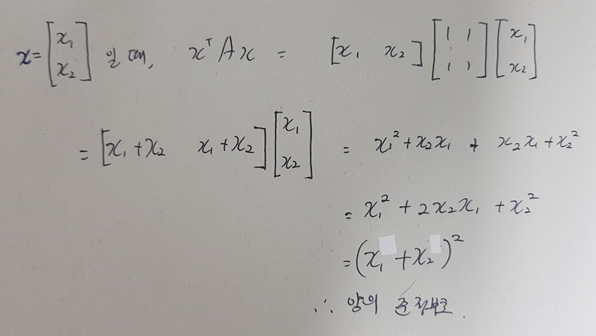

## 행렬 놈

행렬의 놈은 행렬 A에 대해 다음의 식으로 정의되며 보통 $||A||_p$로 표기한다.

아래의 정의는 **요소별 행렬 놈**을 따른다.

\begin{align}
\Vert A \Vert_p = \left( \sum_{i=1}^N \sum_{j=1}^M |a_{ij}|^p \right)^{1/p}  
\end{align}

위 식은 A 행렬의 조합 가능한 모든 ij 원소에 대해 p 제곱합을 구하고 결과값을 1/p 제곱해준 값이다.

위 식에서 p는 보통 1, 2, 무한대를 주로 사용하며 특히 2인 경우 p값의 표시를 생략하기도 하며 **프로베니우스 놈(Frobenius norm)**이라 불리며 $||A||_F$로 표기하기도 한다.

\begin{align}
\Vert A \Vert = \Vert A \Vert_2 = \Vert A \Vert_F = \sqrt{\sum_{i=1}^N \sum_{j=1}^M a_{ij}^2}  
\end{align}

In [27]:
# numpy를 이용한 norm 계산

A = (np.arange(9) -4).reshape(3, 3)
print(A)

np.linalg.norm(A)

[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]


7.745966692414834

위 식에서는 a원소의 값에 대해 절댓값을 취하는 것이 의미가 없어 이를 생략하고 1/p 제곱은 루트에 해당해 위처럼 표시한다.

위 식을 통해 놈은 항상 0보다 크거나 같은 값을 가지는 것을 알 수 있다.

또한 행렬에 대해 놈을 구할 수 있다는 것은 벡터에 대해 놈을 구할 수 있는 것과 같다.

여기서 중요한 점은 **벡터의 놈의 제곱은 벡터의 제곱합과 같다**는 점이다.

$$||x||^2 =  \sum_{i=1}^N x_{i}^2 = x^Tx $$

앞서 언급했듯이 놈은 0 또는 양수를 가지므로 놈의 제곱의 값이 가장 작을 때 놈의 값이 가장 작아진다. 따라서 **놈을 최소화하는 것은 벡터의 제곱합을 최소화 하는 것**과 같다.

In [23]:
# 벡터에 대한 제곱합 계산

x = np.arange(5).reshape(-1, 1)
print(x)

result = 0
for i in x:
    result += i**2
result

[[0]
 [1]
 [2]
 [3]
 [4]]


array([30], dtype=int32)

In [26]:
# 벡터에 대한 놈 제곱 계산

np.linalg.norm(x) ** 2

30.0

## 놈의 특징

- 놈의 값은 0 이상이다. 영행렬일 경우에만 놈의 값이 0이 된다.

$$||A|| \geq 0$$

- 행렬에 스칼라를 곱하면 놈의 값도 그 스칼라의 절댓값을 곱한 것과 같다.

$$||\alpha A|| = |\alpha|||A||$$

In [29]:
x = np.arange(5).reshape(-1, 1)
alpha = 3

np.linalg.norm(x*alpha), alpha * np.linalg.norm(x)

(16.431676725154983, 16.431676725154983)

- 행렬의 합의 놈은 각 행렬의 놈의 합보다 작거나 같다.

In [37]:
a = np.arange(9).reshape(3, 3)
b = (np.arange(9) - 3).reshape(3, 3)

c = a + b

print('행렬의 합의 놈 : ',np.linalg.norm(c))
print('각 행렬의 놈의 합 : ',np.linalg.norm(a) + np.linalg.norm(b))

행렬의 합의 놈 :  21.563858652847824
각 행렬의 놈의 합 :  22.589480720003777


- 정방행렬의 곱의 놈은 각 정방행렬의 놈의 곱보다 작거나 같다.

In [38]:
c = a @ b

print('정방행렬의 곱의 놈 : ',np.linalg.norm(c))
print('각 정방행렬의 놈의 곱 : ',np.linalg.norm(a) * np.linalg.norm(b))

정방행렬의 곱의 놈 :  67.74953874381728
각 정방행렬의 놈의 곱 :  118.64231959971114


## 대각합

**대각합(trace)**은 정방행렬에 대해서만 정의되며 대각 원소의 합으로 계산된다.

따라서 음수 또한 가능하다.

\begin{align}
\text{tr}(A) = a_{11} + a_{22} + \dots + a_{NN}=\sum_{i=1}^{N} a_{ii}
\end{align}

In [39]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [40]:
np.trace(a)

12

따라서 N차원 항등행렬의 대각합은 N이다.

$$tr(I_N) = N$$

In [41]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [42]:
np.trace(np.eye(3))

3.0

## 대각합의 특징

- 스칼라를 곱하면 대각합은 스칼라와 원래의 대각합의 곱이다.

In [43]:
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
np.trace(i * 3), np.trace(i) * 3

(9.0, 9.0)

- 전치연산을 해도 대각합이 달라지지 않는다.(대각합은 정방행렬에 대한 대각원소의 합이기 때문에)

In [48]:
i.T == i

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [49]:
np.trace(i.T), np.trace(i)

(3.0, 3.0)

- 두 행렬의 합의 대각합은 두 행렬의 대각합의 합이다.

In [53]:
a = np.arange(9).reshape(3, 3)
b = (np.arange(9) - 3).reshape(3, 3)

a, b

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[-3, -2, -1],
        [ 0,  1,  2],
        [ 3,  4,  5]]))

In [55]:
np.trace(a + b), np.trace(a) + np.trace(b)

(15, 15)

- **두 행렬의 곱의 대각합은 행렬의 순서를 바꾸어도 달라지지 않는다.**

In [58]:
np.trace(a @ b)

72

In [59]:
np.trace(b @ a)

72

- **세 행렬의 곱의 대각합은 다음과 같이 순서를 순환시켜도 같다.(trace trick)**

In [60]:
a = np.arange(9).reshape(3, 3)
b = (np.arange(9) - 3).reshape(3, 3)
c = (np.arange(9) + 3).reshape(3, 3)

In [61]:
np.trace(a @ b @ c)

1404

In [64]:
np.trace(b @ c @ a)

1404

In [65]:
np.trace(c @ a @ b)

1404

이는 곱셈에서 순서가 바뀌어도 대각합이 같다는 것을 증명한다.

\begin{align}
\text{tr} ((AB)C) = \text{tr} (C(AB)) = \text{tr} ((CA)B) = \text{tr} (B(CA)) 
\end{align}

## 이차행렬의 트레이스 트릭

이차행렬에 트레이스 트릭을 적용하면 아래와 같은 공식을 발견할 수 있다.

$$x^TAx = tr(x^TAx) = tr(Axx^T) = tr(xx^TA)$$

위 식은 ABC 순서를 이차형식의 $x^T, A, x$를 대입한 것으로 이차형식의 결과는 스칼라값이기 때문에 대각합을 취해도 원래의 값과 같다.

- 행렬 A(A∈R2×2)의 놈의 제곱 ∥A∥2이 다음과 같음을 증명하라.

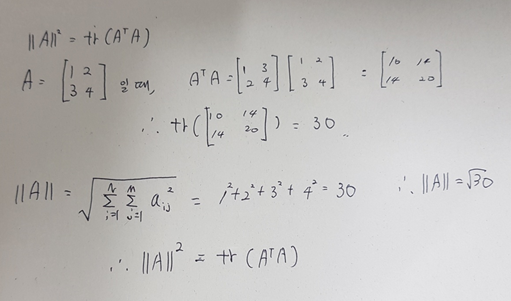

## 행렬식

정방행렬 $A$의 행렬식은 $det(A), detA$, 또는 $|A|$ 기호로 표기한다.

절댓값과 다르다는 점에 유의하자.

행렬 $A$가 1 X 1 스칼라인 경우 행렬식은 자기 자신의 값이 된다.

\begin{align}
\det \left( \begin{bmatrix}a\end{bmatrix} \right) = a  
\end{align}

만약 행렬 A가 스칼라값이 아닌 경우 **여인수 전개(cofactor expansion)**라는 식을 이용하여 계산한다.

\begin{align}
\det(A) = \sum_{i=1}^N \left\{ (-1)^{i+j_0}M_{i,j_0} \right\} a_{i,j_0}  
\end{align}

또는

\begin{align}
\det(A) = \sum_{j=1}^N \left\{ (-1)^{i_0+j} M_{i_0,j} \right\} a_{i_0,j} 
\end{align}

위 식에서 $i_0$, $j_0$는 계산하는 사람이 임의로 선택한 행(열)번호다.

위 식에서 가중치로 사용되는 $M_{ij}$는 **마이너**(minor, 소행렬식)이라고 하며 정방행렬 $A$에서 $i$ 행과 $j$열을 지워서 얻어진 행렬의 행렬식이다.

In [66]:
np.arange(4).reshape(2, 2)

array([[0, 1],
       [2, 3]])

예를 들어 위 행렬에서 $M_{0,0}$의 마이너는 원소 0이 속한 행과 열을 지운 3이 된다.

이 마이너 값에 $(-1)^{i+j}$를 곱한 값을 **여인수 cofactor**라고 하며 $C_{ij}$로 표기한다.

여기서 마이너 값에 곱해지는 값은 부호를 결정해주는 기능을 한다.

여인수(cofactor)를 이용해 위의 식을 다시 표현하면 아래와 같다.

\begin{align}
\det(A) = \sum_{i=1}^N C_{i,j_0} a_{i,j_0}  =  \sum_{j=1}^N C_{i_0,j} a_{i_0,j}  
\end{align}

다음의 행렬이 있다고 가정하고 행렬식을 계산해보자.

\begin{split}
\begin{align}
\begin{bmatrix}
1&2&3\\
4&5&6\\
7&8&9\\
\end{bmatrix}
\end{align}
\end{split}

임의의 행 또는 열을 선택할 때 첫번째를 선택했다고 가정하자.

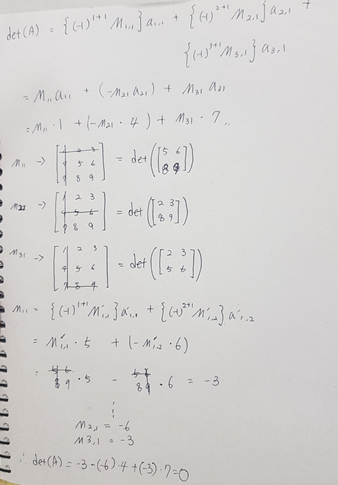

상당히 복잡한 계산이지만 numpy의 det() 명령어로 행렬식을 계산할 수 있다.

In [67]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [68]:
np.linalg.det(A)

0.0

크기가 2 X 2, 3 X 3 정방행렬에 대해서 행렬식은 아래의 공식으로 계산할 수 있다.

\begin{split}
\begin{align}
\det \left( \begin{bmatrix}a&b\\c&d\end{bmatrix} \right) = ad-bc
\end{align}
\end{split}

In [70]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [77]:
np.linalg.det(A)

-2.0

In [75]:
A[0,0] * A[1, 1] - A[0,1] * A[1, 0]

-2

\begin{split}
\begin{align}
\det \left( \begin{bmatrix}a&b&c\\d&e&f\\g&h&i\end{bmatrix} \right) =aei+bfg+cdh-ceg-bdi-afh
\end{align}
\end{split}

In [88]:
A = (np.arange(9) + 4).reshape(3, 3)
A

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [89]:
np.linalg.det(A)

1.0658141036401509e-14

## 행렬식의 특징

- 전치행렬의 행렬식은 원래의 행렬의 행렬식과 같다.

(이는 놈, 대각합, 행렬식 모두 해당된다.)

$$det(A^T) = det(A)$$

In [95]:
np.linalg.det(A), np.linalg.det(A.T)

(1.0658141036401509e-14, -1.0658141036401509e-14)

- 항등행렬의 행렬식은 1이다.

In [97]:
x = np.eye(3)
np.linalg.det(x)

1.0

- **두 행렬의 곱의 행렬식은 각 행렬의 행렬식의 곱과 같다.**

In [112]:
A = np.arange(9).reshape(3,3)
B = (np.arange(9)-2).reshape(3,3)

np.linalg.det(A@B), np.linalg.det(A) * np.linalg.det(B)

(0.0, 0.0)

- 역행렬 $A^{-1}$은 원래 행렬 $A$와 다음 관계를 만족하는 정방행렬이다. $I$는 항등행렬이다.

$$A^{-1}A = AA^{-1} = I$$

- 역행렬의 행렬식은 원래의 행렬의 행렬식의 역수와 같다.

\begin{align}
\det(A^{-1}) = \dfrac{1}{\det(A)}  
\end{align}